## Advanced plotting with `seaborn` 
How can you plot even more variables in a dataset? Sometimes, your experimental design will move beyond two categorical predictors into three or more. How can those be visualised? `seaborn` provides a few *figure-level* plotting options, which essentially means it will create the specified number of axes and subplots as is required. For example, in the `exercise` dataset, there is another variable we haven't looked at - `time`. 

Something called `catplot` allows us to examine this, short for category plot.

In [1]:
import seaborn as sns
exercise = sns.load_dataset('exercise')
tips = sns.load_dataset('tips')

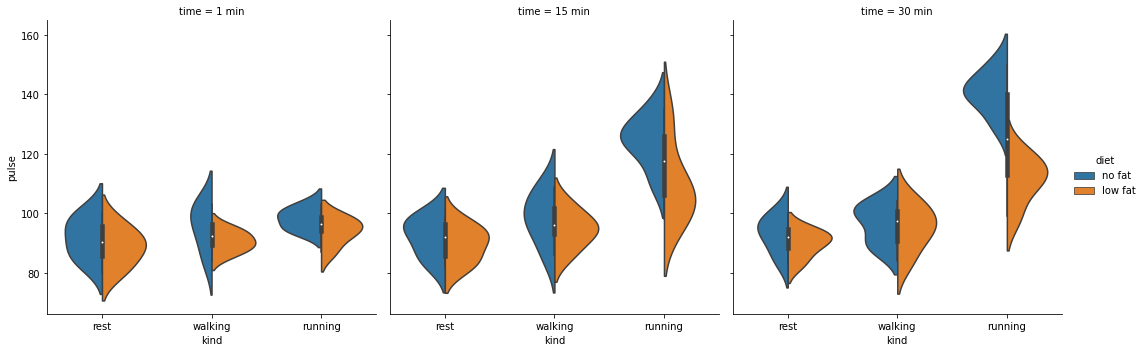

In [2]:
# Catplot example
cat = sns.catplot(data=exercise, x='kind', y='pulse', 
                  hue='diet', col='time', kind='violin', split=True)

`catplot` allows you to spread different variables onto columns or rows, as well as specify the kind of plot using the `kind` keyword.

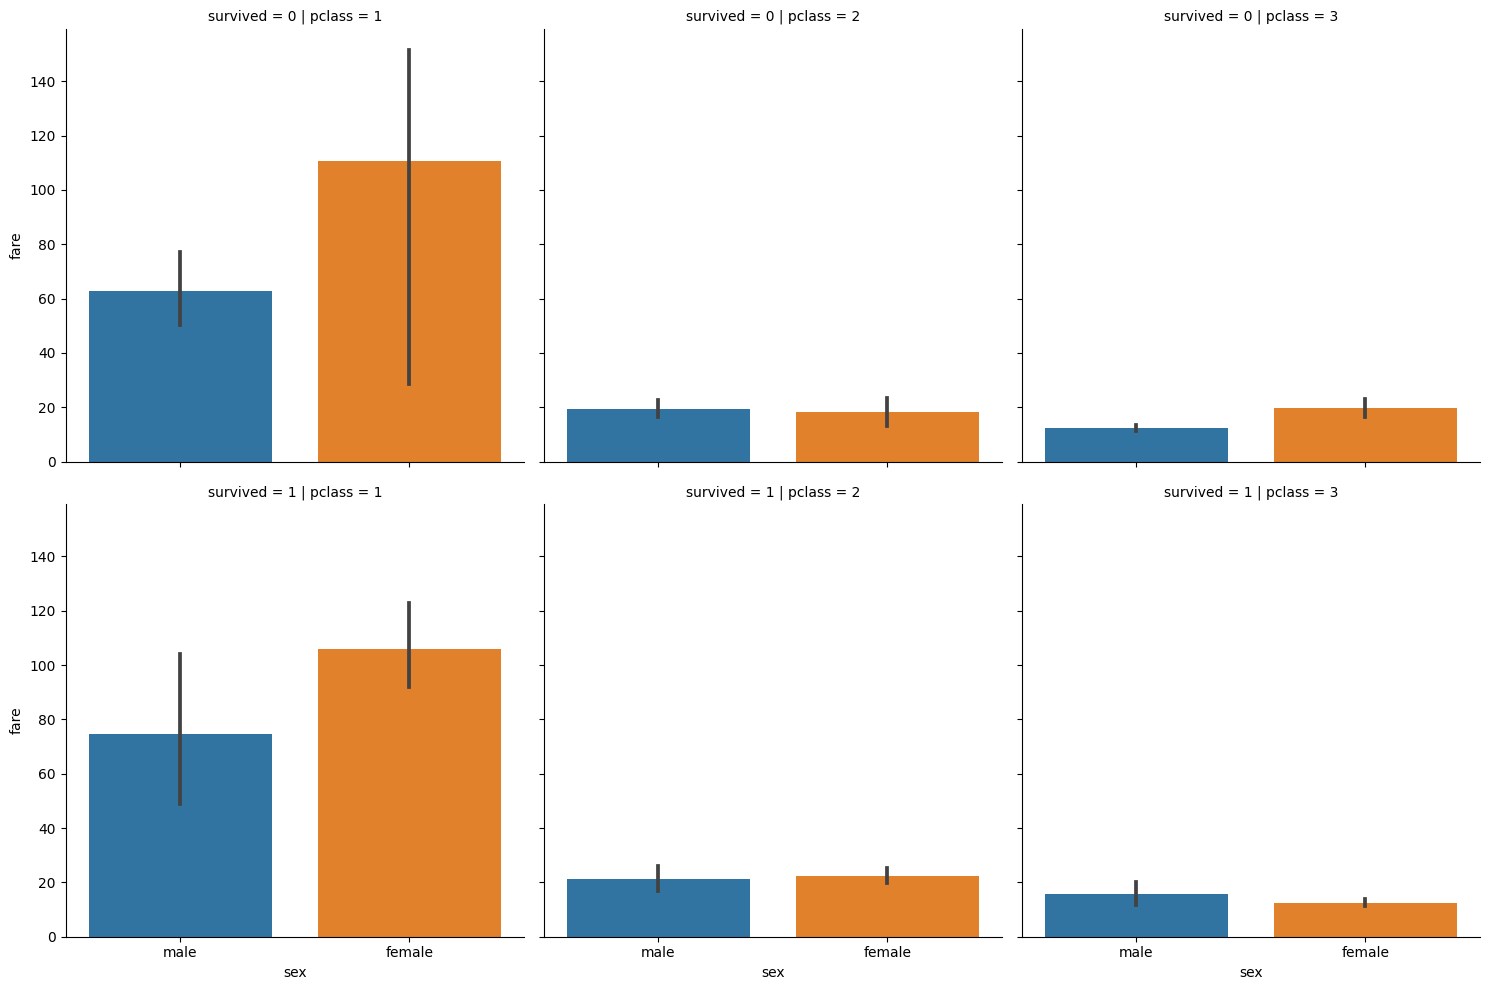

In [3]:
# Titanic data, examining cost of tickets for men/women
# PER class and survival
titanic = sns.load_dataset('titanic')

cat2 = sns.catplot(data=titanic, y='fare', x='sex', 
                   row='survived', col='pclass', kind='bar')

In a similar vein, `lmplot` is capable of visualising relationships between continuous variables. Essentially, this is a scatter plot, but also fits a regression line for you.

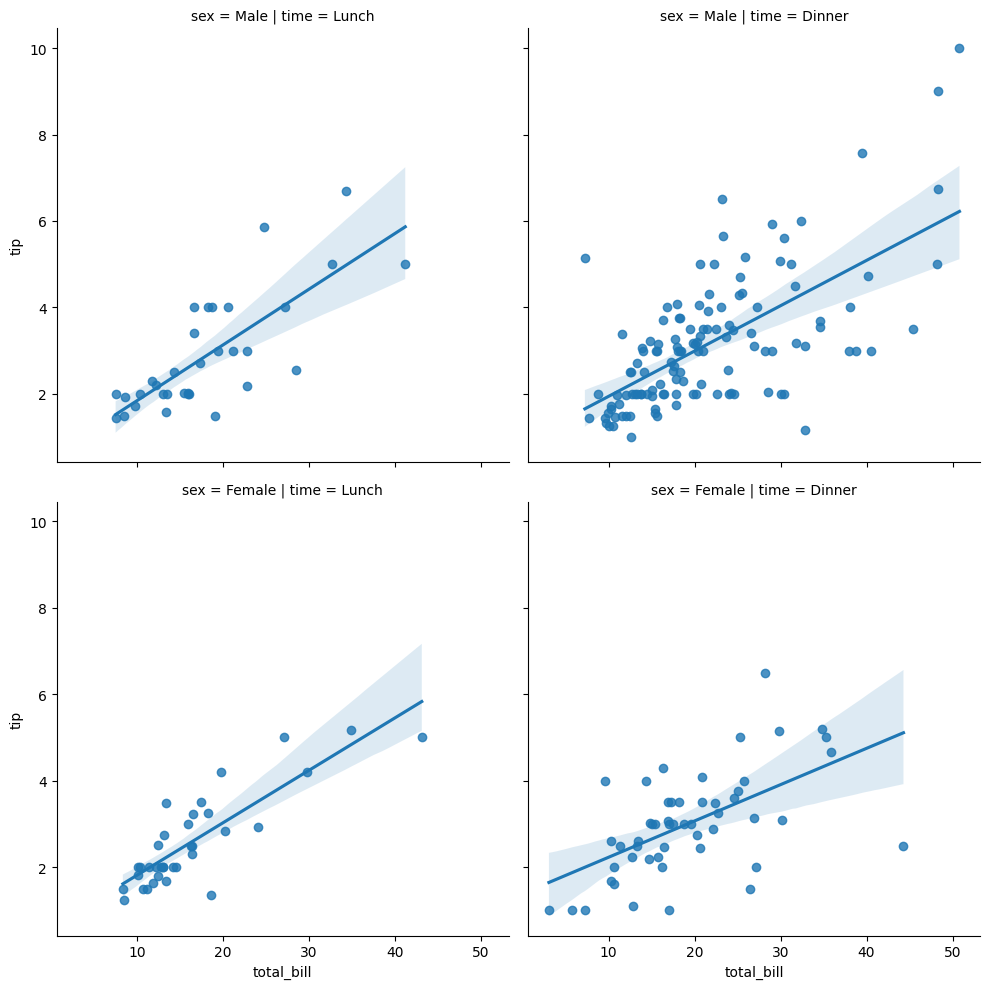

In [4]:
# Show lmplot on tips data
sns.lmplot(data=tips, x='total_bill', y='tip', col='time', row='sex')

There is also `pairplot`, which highlights bivariate and univariate relationships for all *continuous* variables in a dataset. We can examine this in the `penguins` dataset, which describes various body measurements for different species of penguins:

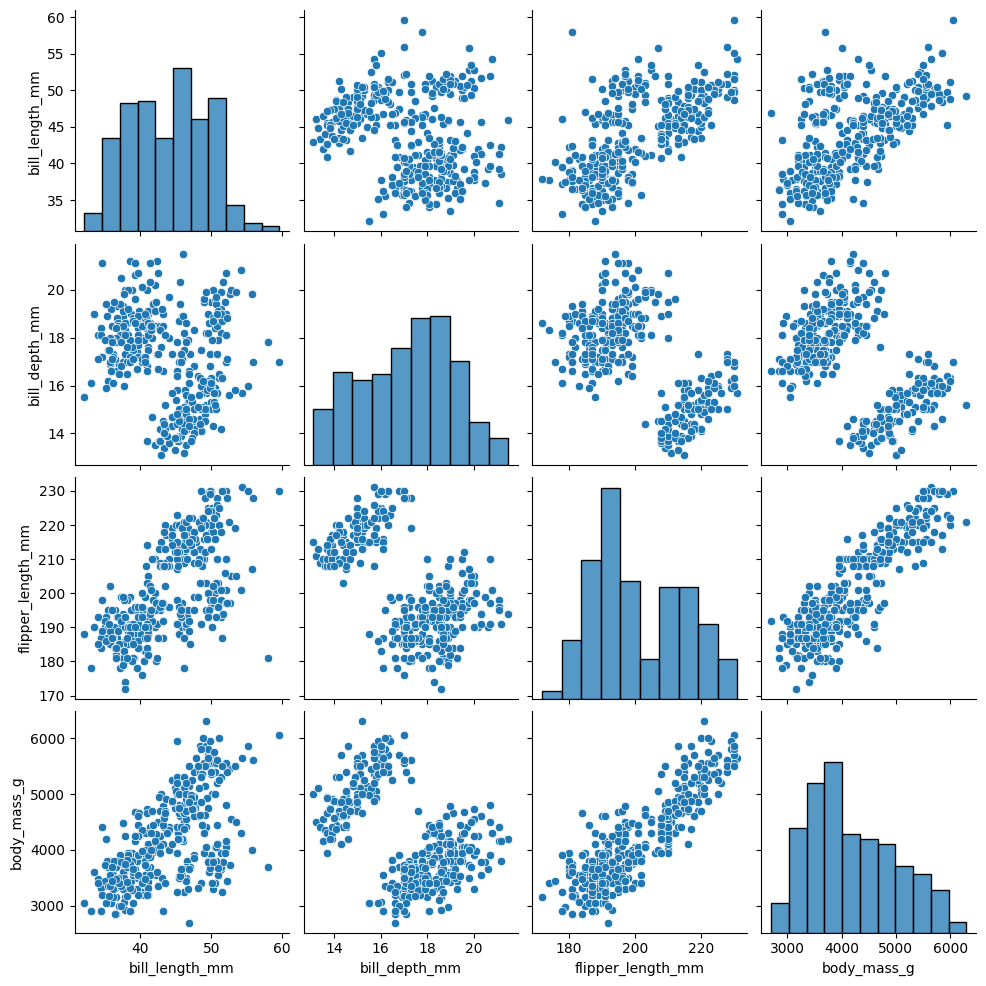

In [5]:
# load penguins
penguins = sns.load_dataset('penguins')

# Simple but powerful
sns.pairplot(penguins)

Finally, `seaborn` has a special class of plot that helps with splitting datasets up by certain variables, called `FacetGrid`. Interestingly, `FacetGrid` does not plot anything on its own - it simply lays out a grid of plots specific to the variable you want. It has a `.map_dataframe` method that allows you to send specific plotting commands to the sub-groups of your data. It's somewhat tricky but extremely flexible. Below, we split the up the `diamonds` dataset, which contains a range of information on diamond cut, quality, price, and other measures.

In [20]:
# Load diamonds
diamonds = sns.load_dataset('diamonds')

display(diamonds.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Lets attempt to plot the relationship between `price` and `carat` for each level of `cut` and `color`, and add colours to each datapoint depending on their `clarity`. Phew! The below cell is hidden but shows how `seaborn` cleverly divides a plot up into the respective subplots with no additional work from us:

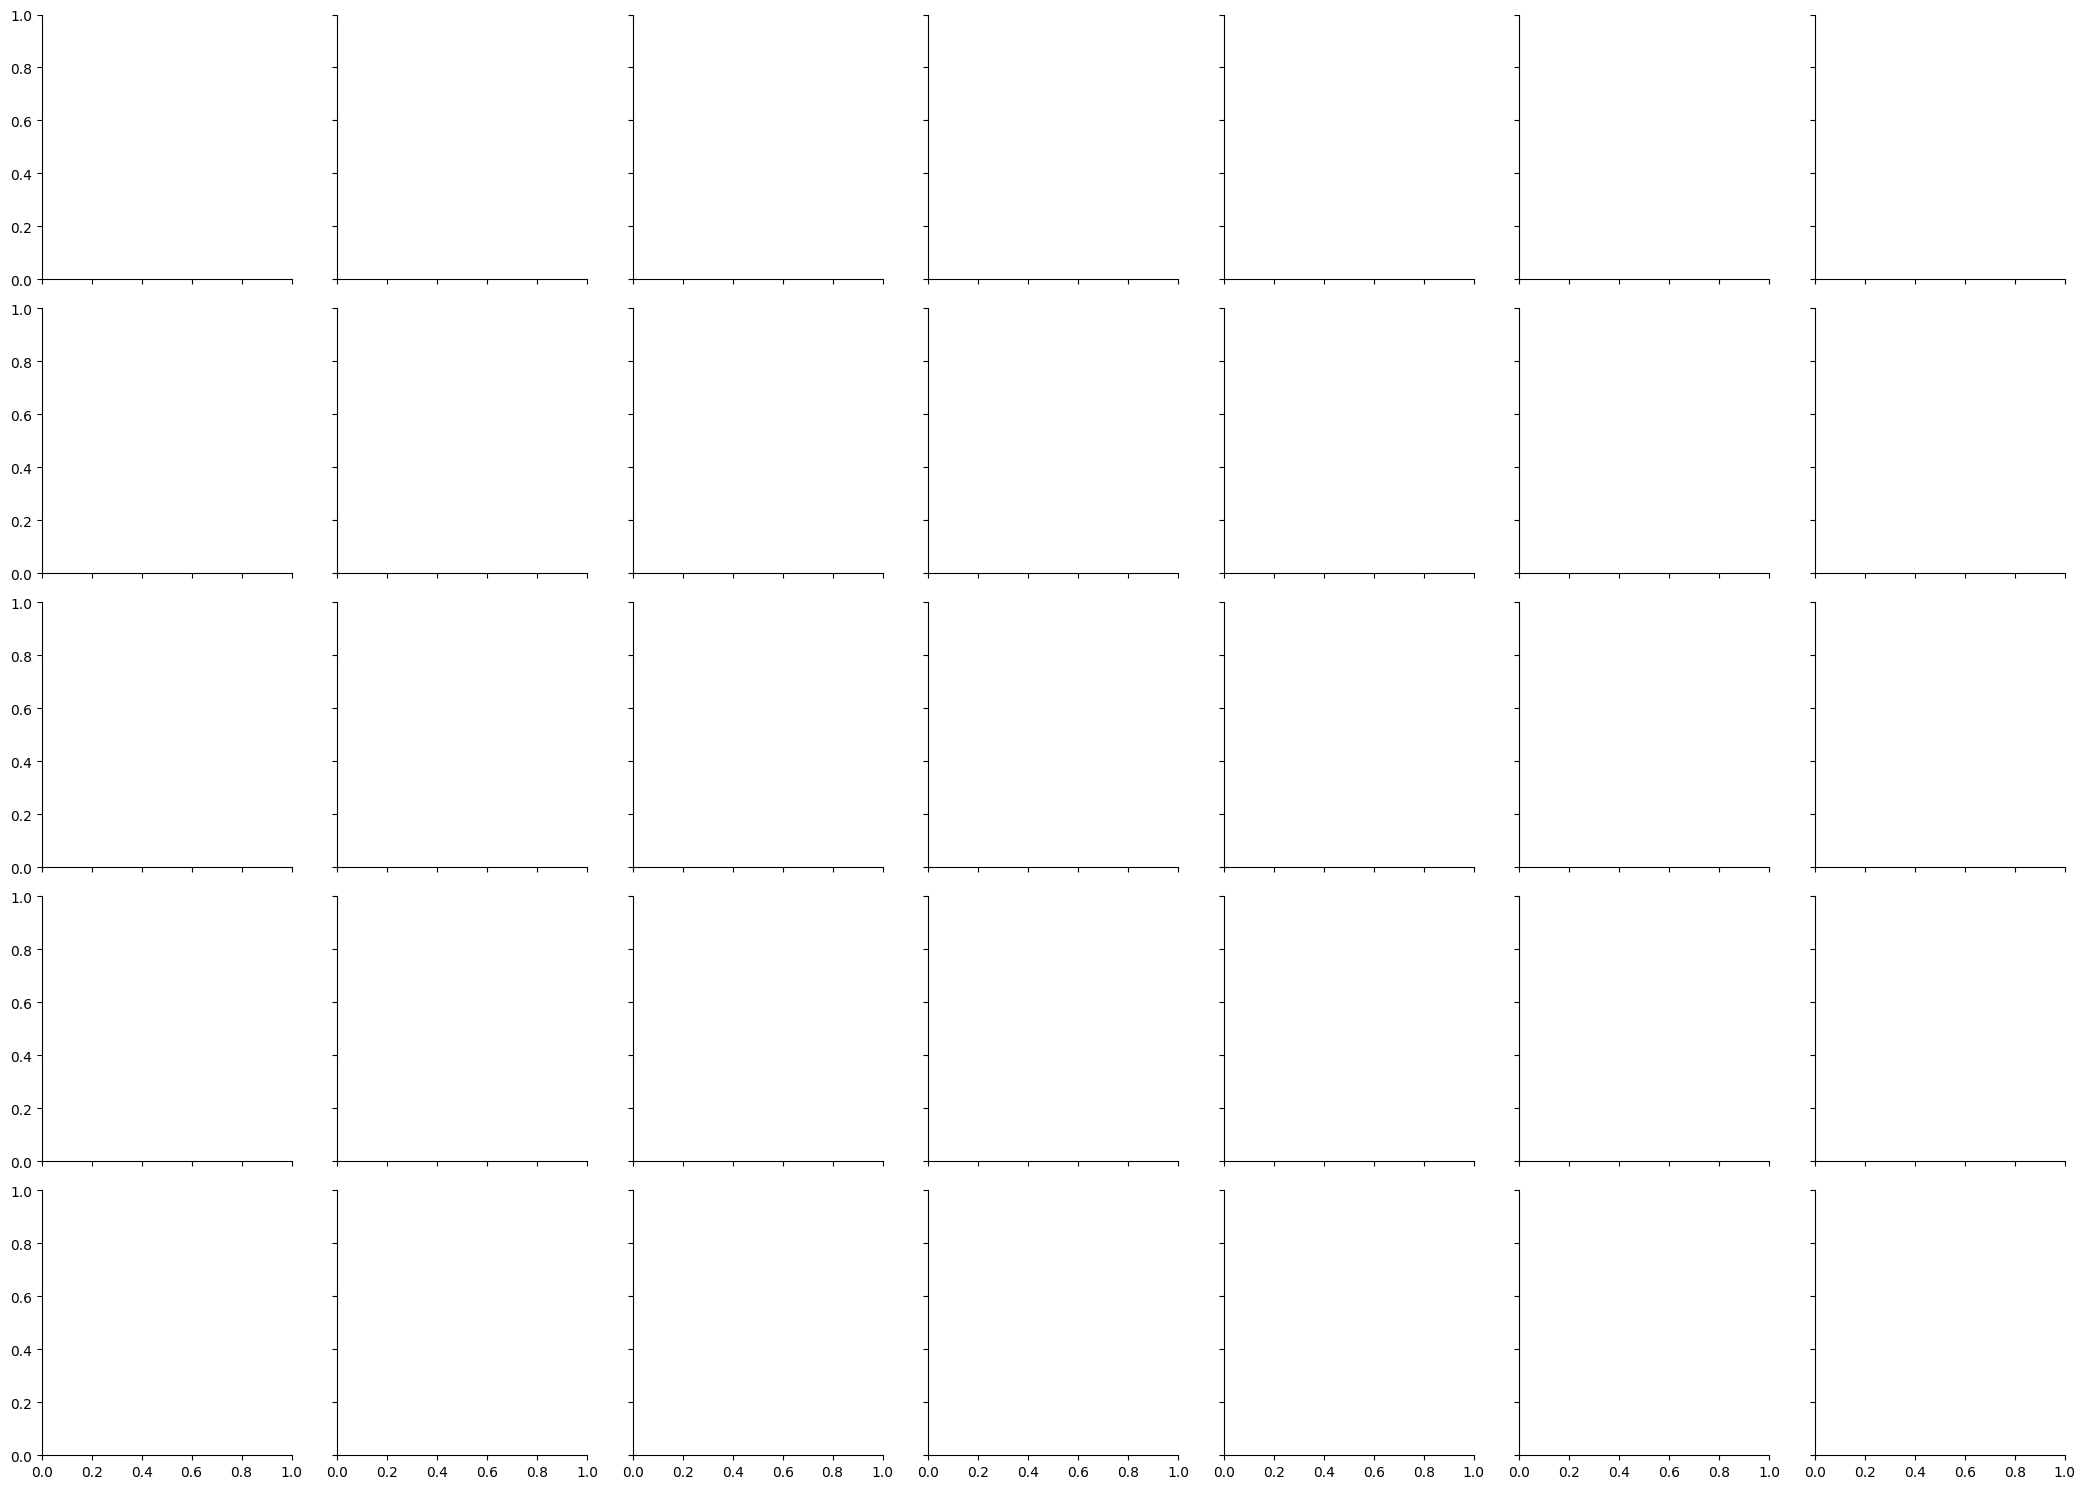

In [21]:
# The initial call to FacetGrid takes the dataset and what you want to put in the rows and columns:
sns.FacetGrid(data=diamonds, row='cut', col='color')

As can be seen, a blank canvas is created that pairs every unique combination of `cut` and `color`. We now add what we want using the `.map_dataframe` method, sending in the `sns.scatterplot` function, with our x, y, and hue variables:

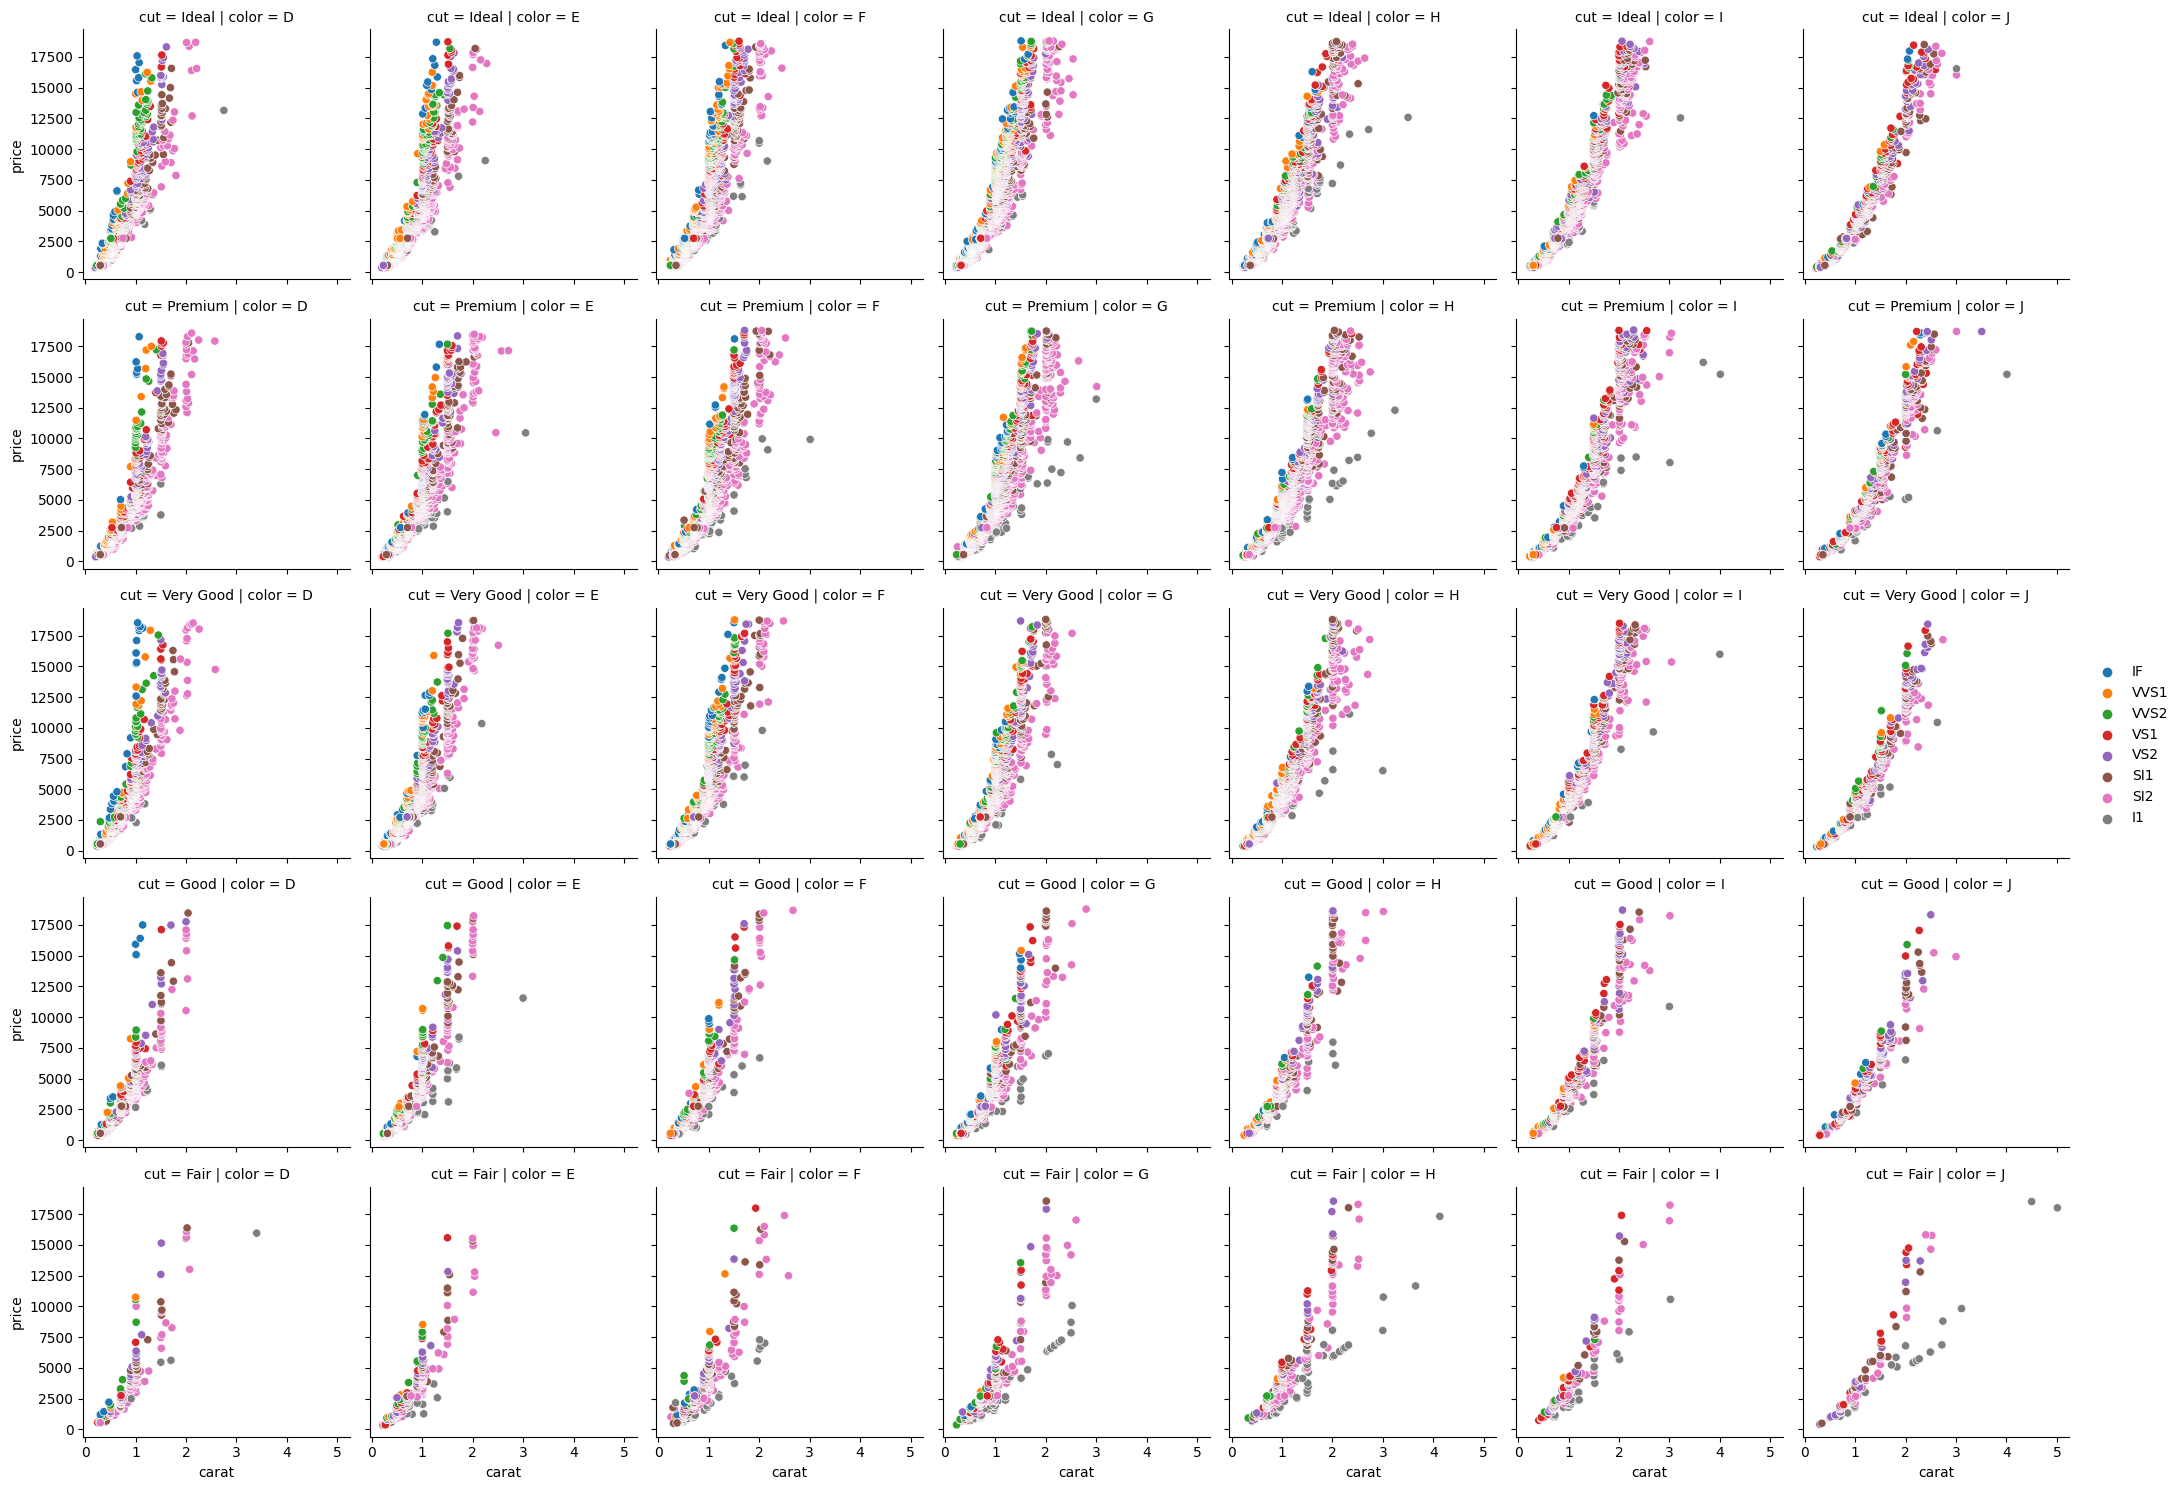

In [23]:
# Map dataframe (as in, map the plotting function to the group-dataframes0
(
    sns.FacetGrid(data=diamonds, row='cut', col='color')
    .map_dataframe(sns.scatterplot, x='carat',
                   y='price', hue='clarity')
    .add_legend() # need to add this to see the legend
)


An amazing amount of data plotted in just a few lines. We could even add another `.map_dataframe` to add a different type of plot on top of the scatter. Custom plotting functions can also be defined and passed to `.map_dataframe` for highly customised plots.

#### Visualisation
You should be able to get data into any shape required for analysis, as well as producing a variety of clear and concise plots that show the relationships amongst the data. For the most part, `seaborn` requires DataFrames in the **long** format, so if your plot doesn't look quite right, try to reformat your data through melting and pivoting.